In [70]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Function to calculate the RSI (Relative Strength Index)
def calculate_rsi(data, period=14): # 14 period RSI allows a good balance for sensitivity and reliability
  delta = data['Close'].diff()      # Calculate the difference in closing prices using diff() instead of deff()
  gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()      # Calculate the average gain
  loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()     # Calculate the average loss
  rs = gain / loss      # Calculate the relative strength (RS)
  rsi = 100 - (100 / (1 + rs))    # Calculate the RSI
  return rsi

In [72]:
# Function to calculate the MACD (Moving Average Convergence/Divergence)
def calculated_macd(data, short_window=12, long_window=26, signal_window=9):  # Default numbers in the industry for effectiveness to find trends, momentum, and stock prices
  short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()  # Short-term ema = Exponential Moving Average
  long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()    # Long-term ema = Exponential Moving Average
  macd = short_ema - long_ema  # Calculate the MACD
  signal = macd.ewm(span=signal_window, adjust=False).mean()  # Calculate the signal line using the signal_window
  return macd, signal

In [73]:
# Read in the Stock Data
data = pd.read_csv('amazon_data.csv')   # Change .csv file for other downloaded stock data

# Show the data
data




,Date,Close,Open,High,Low,Vol.,Change %
0,12/17/14,14.94,14.82,14.98,14.65,88.67M,1.29%
1,12/18/14,14.89,15.20,15.22,14.66,154.76M,-0.33%
2,12/19/14,14.99,14.85,15.08,14.78,174.18M,0.67%
3,12/22/14,15.33,15.10,15.37,15.10,80.08M,2.27%
4,12/23/14,15.31,15.35,15.37,15.16,54.37M,-0.13%
...,...,...,...,...,...,...,...
2512,12/11/24,230.26,226.41,231.20,226.26,35.39M,2.32%
2513,12/12/24,228.97,229.83,231.09,227.63,28.20M,-0.56%
2514,12/13/24,227.46,228.40,230.20,225.86,28.77M,-0.66%
2515,12/16/24,232.93,230.23,233.00,228.01,37.55M,2.40%


In [74]:
# Calculate the RSI and creating a column for it on the data table
data['RSI'] = calculate_rsi(data)

# Calculate the MACD and creating a column for it on the data table
data['MACD'], data['SIGNAL'] = calculated_macd(data)

# Show the data
data

,Date,Close,Open,High,Low,Vol.,Change %,RSI,MACD,SIGNAL
0,12/17/14,14.94,14.82,14.98,14.65,88.67M,1.29%,NaN,0.000000,0.000000
1,12/18/14,14.89,15.20,15.22,14.66,154.76M,-0.33%,NaN,-0.003989,-0.000798
2,12/19/14,14.99,14.85,15.08,14.78,174.18M,0.67%,NaN,0.000909,-0.000456
3,12/22/14,15.33,15.10,15.37,15.10,80.08M,2.27%,NaN,0.031858,0.006007
4,12/23/14,15.31,15.35,15.37,15.16,54.37M,-0.13%,NaN,0.054148,0.015635
...,...,...,...,...,...,...,...,...,...,...
2512,12/11/24,230.26,226.41,231.20,226.26,35.39M,2.32%,79.053480,7.686036,5.851450
2513,12/12/24,228.97,229.83,231.09,227.63,28.20M,-0.56%,84.832612,7.954722,6.272105
2514,12/13/24,227.46,228.40,230.20,225.86,28.77M,-0.66%,84.352355,7.954124,6.608508
2515,12/16/24,232.93,230.23,233.00,228.01,37.55M,2.40%,84.746137,8.299363,6.946679


In [75]:
# Function to generate Trading Signals
def generate_signals(data):
  buy_signals = []    # Storing Buy Signals in empty list
  sell_signals = []   # Storing Sell Signals in empty list

# Creating a loop to iterate over the indices of a sequence (data)
  for i in range(len(data)):

# If RSI is below 60 and Signal line is below MACD line then BUY
    if data['RSI'][i] < 40 and data['MACD'][i] > data['SIGNAL'][i]: #Buy signal condition
      buy_signals.append(data['Close'][i])
      sell_signals.append(np.nan) # Does not sell

    elif data['RSI'][i] > 60 and data['MACD'][i] < data['SIGNAL'][i]: #Sell signal condition
      buy_signals.append(np.nan) # Does not buy
      sell_signals.append(data['Close'][i])

    else:
      buy_signals.append(np.nan)
      sell_signals.append(np.nan)

  return buy_signals, sell_signals



In [76]:
# Adding Buy_Signals and Sell_Signals in the data table
data['Buy_Signals'], data['Sell_Signals'] = generate_signals(data)

# Show the data
data


,Date,Close,Open,High,Low,Vol.,Change %,RSI,MACD,SIGNAL,Buy_Signals,Sell_Signals
0,12/17/14,14.94,14.82,14.98,14.65,88.67M,1.29%,NaN,0.000000,0.000000,NaN,NaN
1,12/18/14,14.89,15.20,15.22,14.66,154.76M,-0.33%,NaN,-0.003989,-0.000798,NaN,NaN
2,12/19/14,14.99,14.85,15.08,14.78,174.18M,0.67%,NaN,0.000909,-0.000456,NaN,NaN
3,12/22/14,15.33,15.10,15.37,15.10,80.08M,2.27%,NaN,0.031858,0.006007,NaN,NaN
4,12/23/14,15.31,15.35,15.37,15.16,54.37M,-0.13%,NaN,0.054148,0.015635,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,12/11/24,230.26,226.41,231.20,226.26,35.39M,2.32%,79.053480,7.686036,5.851450,NaN,NaN
2513,12/12/24,228.97,229.83,231.09,227.63,28.20M,-0.56%,84.832612,7.954722,6.272105,NaN,NaN
2514,12/13/24,227.46,228.40,230.20,225.86,28.77M,-0.66%,84.352355,7.954124,6.608508,NaN,NaN
2515,12/16/24,232.93,230.23,233.00,228.01,37.55M,2.40%,84.746137,8.299363,6.946679,NaN,NaN


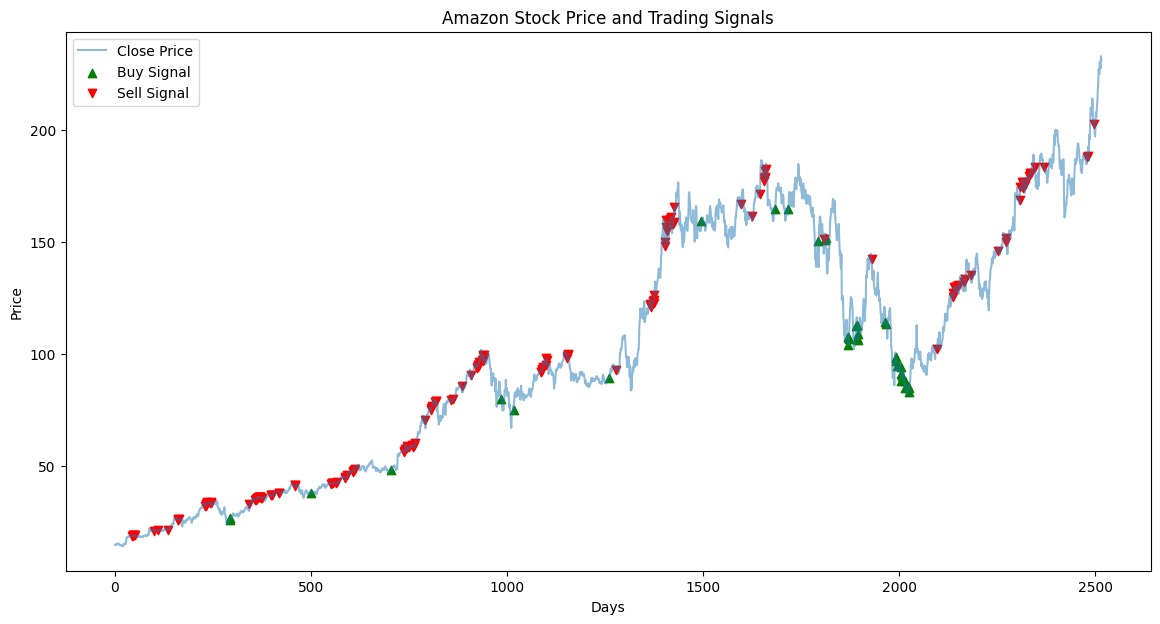

In [77]:
# Plot the stock price and signals
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', alpha = 0.5)
plt.scatter(data.index, data['Buy_Signals'], label='Buy Signal', marker='^', color='green', alpha = 1)
plt.scatter(data.index, data['Sell_Signals'], label='Sell Signal', marker='v', color='red', alpha = 1)
plt.title('Amazon Stock Price and Trading Signals')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show() # Displaying the plot


